<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/nhandienmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Khuôn mặt

/content/gdrive/MyDrive/Colab Notebooks/Khuôn mặt


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Khuôn mặt/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Khuôn mặt/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Dương Duy Thoại': 0, 'Lại Trí Minh': 1, 'Lê Mạnh Cường': 2}

In [ ]:
test_set.class_indices

{'Dương Duy Thoại': 0, 'Lại Trí Minh': 1, 'Lê Mạnh Cường': 2}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=50,batch_size=128,verbose=1)

6/6 [==============================] - 15s 2s/step - loss: 6.5012e-06 - accuracy: 1.0000
Epoch 40/50
6/6 [==============================] - 16s 3s/step - loss: 7.5401e-05 - accuracy: 1.0000
Epoch 41/50
6/6 [==============================] - 15s 3s/step - loss: 1.2047e-06 - accuracy: 1.0000
Epoch 42/50
6/6 [==============================] - 15s 3s/step - loss: 3.2582e-05 - accuracy: 1.0000
Epoch 43/50
6/6 [==============================] - 15s 2s/step - loss: 4.2748e-06 - accuracy: 1.0000
Epoch 44/50
6/6 [==============================] - 15s 2s/step - loss: 3.2120e-07 - accuracy: 1.0000
Epoch 45/50
6/6 [==============================] - 14s 3s/step - loss: 9.7490e-06 - accuracy: 1.0000
Epoch 46/50
6/6 [==============================] - 14s 2s/step - loss: 1.7377e-06 - accuracy: 1.0000
Epoch 47/50
6/6 [==============================] - 14s 2s/step - loss: 4.5924e-05 - accuracy: 1.0000
Epoch 48/50
6/6 [==============================] - 15s 2s/step - loss: 6.2915e-07 - accuracy: 1.0000
Ep

In [ ]:
model.save('face.h5')

In [ ]:
model_face = load_model('face.h5')

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 5.565083938563475e-06
Train Accuracy 1.0


1/1 [==============================] - 0s 318ms/step
Đây là : Dương Duy Thoại


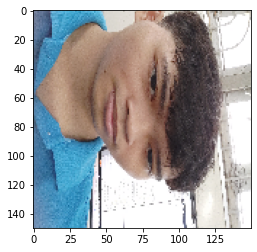

In [ ]:
img = load_img('/content/1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_face=['Dương Duy Thoại', 'Lại Trí Minh', 'Lê Mạnh Cường']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_face[a])

1/1 [==============================] - 0s 16ms/step
Đây là : Lê Mạnh Cường


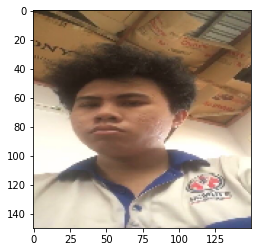

In [ ]:
img = load_img('/content/2.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_face=['Dương Duy Thoại', 'Lại Trí Minh', 'Lê Mạnh Cường']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_face[a])

In [ ]:
!jupyter nbconvert --to html "/content/nhandienmat.ipynb"

[NbConvertApp] Converting notebook /content/nhandienmat.ipynb to html
[NbConvertApp] Writing 528339 bytes to /content/nhandienmat.html
